# Day and Night Classifier

I am trying to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images. The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
image_dir_training_day = os.listdir('../day-night-classifier-master/images/training/day/')
print(image_dir_training_day[:10]) #the output we get are the .png files

image_dir_training_night = os.listdir('../day-night-classifier-master/images/training/night/')
print('\n')
print(image_dir_training_night[:10])

['20151101_142050.jpg', '20151101_145049.jpg', '20151101_145511.jpg', '20151101_155059.jpg', '20151101_155521.jpg', '20151101_162053.jpg', '20151101_162527.jpg', '20151101_165511.jpg', '20151101_172044.jpg', '20151101_172507.jpg']


['20151101_082503.jpg', '20151101_085511.jpg', '20151101_092511.jpg', '20151101_095505.jpg', '20151101_105513.jpg', '20151101_112505.jpg', '20151101_115515.jpg', '20151101_122510.jpg', '20151101_125509.jpg', '20151101_132459.jpg']


In [3]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

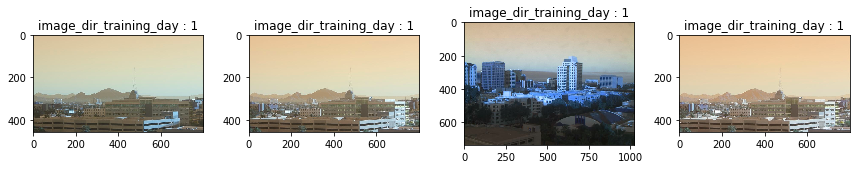

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../day-night-classifier-master/images/training/day' + "/" + image_dir_training_day[i])
    plt.imshow(img)
    plt.title('image_dir_training_day : 1')
    plt.tight_layout()
plt.show()

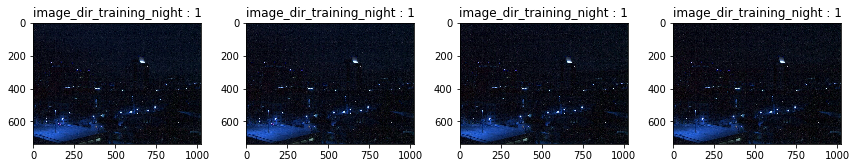

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../day-night-classifier-master/images/training/night' + "/" + image_dir_training_night[i])
    plt.imshow(img)
    plt.title('image_dir_training_night : 1')
    plt.tight_layout()
plt.show()

# Loading and Analyzing the dataset

In [6]:
data = []
labels = []
for img in image_dir_training_day:
    try:
        img_read = plt.imread('../day-night-classifier-master/images/training/day/' + "/" + img)
        img_resize = cv2.resize(img_read, (200, 200))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in image_dir_training_night:
    try:
        img_read = plt.imread('../day-night-classifier-master/images/training/night' + "/" + img)
        img_resize = cv2.resize(img_read, (200, 200))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

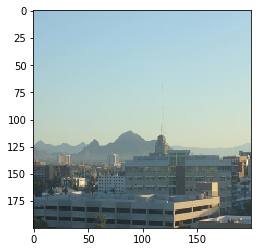

In [7]:
plt.imshow((data[0]).astype(np.uint8))
plt.show()

# Preprocessing the Data input images

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [9]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [11]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [12]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (192, 200, 200, 3)
SHAPE OF TESTING IMAGE DATA : (48, 200, 200, 3)
SHAPE OF TRAINING LABELS : (192, 2)
SHAPE OF TESTING LABELS : (48, 2)


In [13]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers

In [14]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [15]:
#instantiate the model
height = 200
width = 200
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 99, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        1

In [16]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [38]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 5)

Train on 192 samples
Epoch 1/20
192/192 [==============================] - 8s 42ms/sample - loss: 0.1885 - accuracy: 0.9479
Epoch 2/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.0590 - accuracy: 0.9792
Epoch 3/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.0825 - accuracy: 0.9844
Epoch 4/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.0858 - accuracy: 0.9635
Epoch 5/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.1227 - accuracy: 0.9583s - loss: 0.1018 - accuracy: 0.
Epoch 6/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.1279 - accuracy: 0.9635
Epoch 7/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.2759 - accuracy: 0.8854
Epoch 8/20
192/192 [==============================] - 8s 41ms/sample - loss: 0.0789 - accuracy: 0.9844
Epoch 9/20
192/192 [==============================] - 8s 40ms/sample - loss: 0.1766 - accuracy: 0.9688
Epoch 10/20
192/192 [

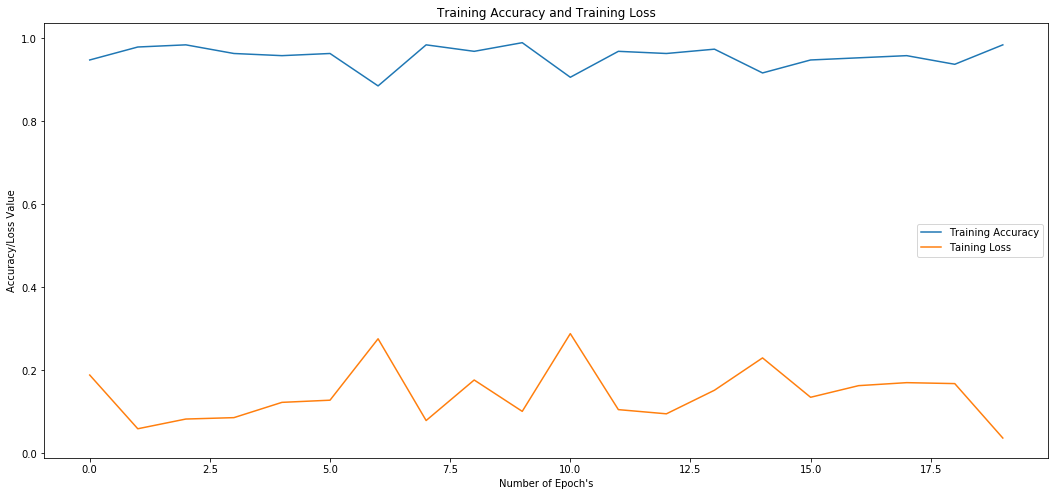

In [39]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [40]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

48/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [41]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.01120258386557301
ACCURACY : 1.0


In [42]:
model.save('Day_Night_model_cnn.h5')

# Checking  the Model

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model1 = load_model('Day_Night_model_cnn.h5')


In [44]:
image_dir_test_day = os.listdir('../day-night-classifier-master/images/test/day/')
print(image_dir_test_day[:5])
image_dir_test_night = os.listdir('../day-night-classifier-master/images/test/night/')
print(image_dir_test_night[:5])

['20151101_152050.jpg', '20151101_152512.jpg', '20151101_165048.jpg', '20151101_222053.jpg', '20151101_225048.jpg']
['20151101_072507.jpg', '20151101_230938.jpg', '20151101_231132.jpg', '20151101_231455.jpg', '20151101_232014.jpg']


In [45]:
data_test = []
labels_test = []
for img in image_dir_test_day:
    try:
        img_read = plt.imread('../day-night-classifier-master/images/test/day/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data_test.append(img_array)
        labels_test.append(1)
    except:
        None
        
for img in image_dir_test_night:
    try:
        img_read = plt.imread('../day-night-classifier-master/images/test/night' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data_test.append(img_array)
        labels_test.append(0)
    except:
        None

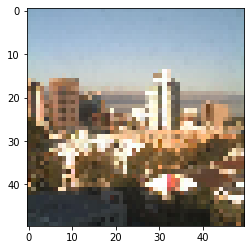

In [46]:
plt.imshow((data_test[1]).astype(np.uint8))
plt.show()

[[0.98600024 0.01399975]]


'--------------------------------------------------------------------------------------------------------------------'

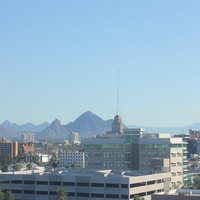

[0]
Day
[[0.24021843 0.75978166]]


'--------------------------------------------------------------------------------------------------------------------'

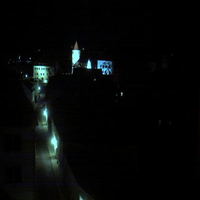

[1]
Night
[[0.022239   0.97776103]]


'--------------------------------------------------------------------------------------------------------------------'

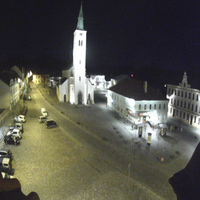

[1]
Night
[[0.98738223 0.01261779]]


'--------------------------------------------------------------------------------------------------------------------'

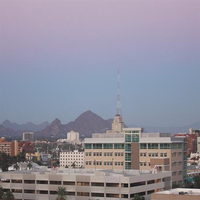

[0]
Day
[[0.38121477 0.6187852 ]]


'--------------------------------------------------------------------------------------------------------------------'

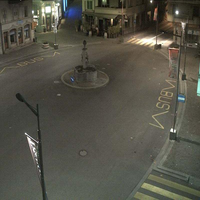

[1]
Night
[[0.24095646 0.7590436 ]]


'--------------------------------------------------------------------------------------------------------------------'

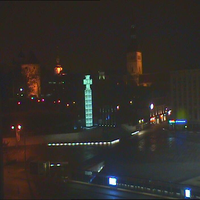

[1]
Night
[[0.98181665 0.01818336]]


'--------------------------------------------------------------------------------------------------------------------'

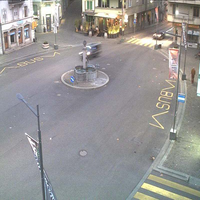

[0]
Day
[[0.9902704  0.00972959]]


'--------------------------------------------------------------------------------------------------------------------'

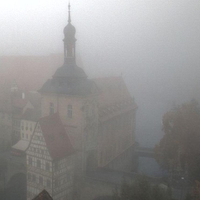

[0]
Day


In [47]:
%matplotlib inline

from tensorflow.keras.applications.mobilenet import preprocess_input


from PIL import Image, ImageFile



image_test_malaria = os.listdir('../day-night-classifier-master/images/Test_made/')

images = [
    "../day-night-classifier-master/images/Test_made/20151101_152050.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_003534.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_004042.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_005050.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_012545.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_013807.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_055603.jpg",
    "../day-night-classifier-master/images/Test_made/20151102_074127.jpg",
]
for pic in images:
    x=[]
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    img = Image.open(pic)
    img.load()
    img = img.resize((200,200), Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model1.predict(x)
    print(pred)
    display ("--------------------------------------------------------------------------------------------------------------------")
    display(img)
    labels = ["Day","Night"]
    print(np.argmax(pred,axis=1))
    print(labels[np.argmax(pred,axis=1)[0]])